In [1]:
import numpy as np
import pickle
glove_path = '/home/hsher/glove/'
npzfile = np.load(f'{glove_path}/6B.50_words.npz')
vectors = npzfile['arr_0']
#vectors.flush()
words = pickle.load(open(f'{glove_path}/6B.50_words.pkl', 'rb'))
word2idx = pickle.load(open(f'{glove_path}/6B.50_idx.pkl', 'rb'))
glove = {w: vectors[word2idx[w]] for w in words}

In [2]:
vectors.shape

(400001, 50)

In [3]:
len(words)

400001

In [4]:
# load ingredients
with open('train_ing_count.pickle', 'rb') as f:
    all_ing=pickle.load( f)

In [5]:
len(all_ing)

6093

In [6]:
# create ing -> embedding list
ing_list = []
ing_vectors = []
for n, ing in enumerate(all_ing):
    sum_embedding = np.zeros(50)
    ing_list.append(ing)
    for word in ing.split(' '):
        try:
            sum_embedding += glove[word]
        except:
            print(f'{word} dont exist')
    ing_vectors.append(sum_embedding)
    
    #if n>500:
    #    break
ing_vectors = np.stack(ing_vectors)

katakuriko dont exist
2% dont exist
confectioners' dont exist
panir dont exist
avocadoes dont exist
2% dont exist
lime, dont exist
limes, dont exist
80% dont exist
kirschwasser dont exist
tubetti dont exist
lemon, dont exist
ditalini dont exist
 dont exist
lawry's dont exist
98% dont exist
phoron dont exist
panang dont exist
lemon, dont exist
breakstone's dont exist
baker's dont exist
orange, dont exist
craisins dont exist
rigate dont exist
konnyaku dont exist
hersheys dont exist
90% dont exist
sucanat dont exist
nutmeats dont exist
oelek dont exist
9" dont exist
courgettes dont exist
momokawa dont exist
devil's dont exist
peapods dont exist
lemon, dont exist
funghi dont exist
bocconcini dont exist
konbu dont exist
1% dont exist
arils dont exist
frank's dont exist
pepperoncini dont exist
m's dont exist
komatsuna dont exist
aminos dont exist
mirlitons dont exist
acini dont exist
limes, dont exist
mccormick's dont exist
mochiko dont exist
fideos dont exist
borlotti dont exist
aminos dont

In [7]:
import numpy as np
from sklearn.manifold import TSNE

ingd_embedded = TSNE(n_components=2, 
               init='random').fit_transform(ing_vectors.astype(float))

In [8]:
ingd_embedded.shape

(6093, 2)

Text(0, 0.5, 't-SNE-2')

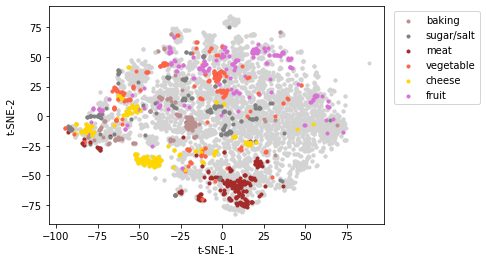

In [9]:
import matplotlib.pyplot as plt
plt.scatter(x = ingd_embedded[:,0], y = ingd_embedded[:,1], color = 'lightgrey', marker = '.')

for idx, name in enumerate(ing_list):
    if 'cheese' in name:
        x,y = ingd_embedded[idx,:]
        #plt.text(x,y,name)
        plt.scatter(x = x, y = y, color = 'gold', marker = '.', label = 'cheese')
    if 'pork' in name or 'beef' in name or 'bacon' in name:
        x,y = ingd_embedded[idx,:]
        #plt.text(x,y,name)
        plt.scatter(x = x, y = y, color = 'brown', marker = '.', label = 'meat')
    if 'tomato' in name or 'onion' in name:
        x,y = ingd_embedded[idx,:]
        #plt.text(x,y,name)
        plt.scatter(x = x, y = y, color = 'tomato', marker = '.', label = 'vegetable')
    if 'grape' in name or 'berry' in name or 'apple' in name:
        x,y = ingd_embedded[idx,:]
        #plt.text(x,y,name)
        plt.scatter(x = x, y = y, color = 'orchid', marker = '.', label = 'fruit')
    if 'sugar' in name or 'salt' in name:
        x,y = ingd_embedded[idx,:]
        #plt.text(x,y,name)
        plt.scatter(x = x, y = y, color = 'grey', marker = '.', label = 'sugar/salt')
    if 'baking' in name or 'flour' in name:
        x,y = ingd_embedded[idx,:]
        #plt.text(x,y,name)
        plt.scatter(x = x, y = y, color = 'rosybrown', marker = '.', label = 'baking')


handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(1.3,1))

plt.xlabel('t-SNE-1')
plt.ylabel('t-SNE-2')